# [10] Polish dataset

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

 ## 1. Подгрузка данных

### Abstract

Беды:
1. ~~В данных пропуски, заполненные значениями "?", примерно половина записей содержат такие строки.~~ - решено
2. ~~Из-за этого не удается перевести все данные в числовой формат и...~~- решено
3. ~~Разбить выборку и сохранить.~~ - решено

Проблему решили заменой всех таких значений на Nan, дальше то же самое.

Набор данных посвящен прогнозированию банкротства польских компаний. Содержит кучу вычисленных параметров из финансовых показателей компаний, ниже приведено описание каждого атрибута. Данные собирались с 2007 по 2013 г.г., организованы в 5-ти таблицах за каждый год.

#### Читаем все таблицы, склеиваем в одну большую.

In [2]:
df_1 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/1year.arff",
                  header = None, sep = ',')
df_2 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/2year.arff",
                  header = None, sep = ',')
df_3 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/3year.arff",
                  header = None, sep = ',')
df_4 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/4year.arff",
                  header = None, sep = ',')
df_5 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/5year.arff",
                  header = None, sep = ',')
df = df_1.append(df_2).append(df_3).append(df_4).append(df_5).reset_index().drop('index',1)
df.columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
              'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
              'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
              'X31','X32','X33','X34','X35','X36','X37','X38','X39','X40',
              'X41','X42','X43','X44','X45','X46','X47','X48','X49','X50',
              'X51','X52','X53','X54','X55','X56','X57','X58','X59','X60',
              'X61','X62','X63','X64', 'target']


/Users/vaneque/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/vaneque/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/vaneque/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


###   Предобработка пропущенных значений

In [4]:
df.isna().sum(axis=0)

X1        0
X2        0
X3        0
X4        0
X5        0
         ..
X61       0
X62       0
X63       0
X64       0
target    0
Length: 65, dtype: int64

Видим, что пропущенных значений 'Nan' в таблицы нет, однако они выражены символами '?', которые мешают дальнейшей работе, заменяем их на Nan.

In [5]:
for item in df.columns:
    df[item] = df[item].replace('?', np.nan)
    df[item] = pd.to_numeric(df[item])

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


## 2. Анализ факторов

### Список факторов

- X1 net profit / total assets 
- X2 total liabilities / total assets 
- X3 working capital / total assets 
- X4 current assets / short-term liabilities 
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
- X6 retained earnings / total assets 
- X7 EBIT / total assets 
- X8 book value of equity / total liabilities 
- X9 sales / total assets 
- X10 equity / total assets 
- X11 (gross profit + extraordinary items + financial expenses) / total assets 
- X12 gross profit / short-term liabilities 
- X13 (gross profit + depreciation) / sales 
- X14 (gross profit + interest) / total assets 
- X15 (total liabilities * 365) / (gross profit + depreciation) 
- X16 (gross profit + depreciation) / total liabilities 
- X17 total assets / total liabilities 
- X18 gross profit / total assets 
- X19 gross profit / sales 
- X20 (inventory * 365) / sales 
- X21 sales (n) / sales (n-1) 
- X22 profit on operating activities / total assets 
- X23 net profit / sales 
- X24 gross profit (in 3 years) / total assets 
- X25 (equity - share capital) / total assets 
- X26 (net profit + depreciation) / total liabilities 
- X27 profit on operating activities / financial expenses 
- X28 working capital / fixed assets 
- X29 logarithm of total assets 
- X30 (total liabilities - cash) / sales 
- X31 (gross profit + interest) / sales 
- X32 (current liabilities * 365) / cost of products sold 
- X33 operating expenses / short-term liabilities 
- X34 operating expenses / total liabilities 
- X35 profit on sales / total assets 
- X36 total sales / total assets 
- X37 (current assets - inventories) / long-term liabilities 
- X38 constant capital / total assets 
- X39 profit on sales / sales 
- X40 (current assets - inventory - receivables) / short-term liabilities 
- X41 total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
- X42 profit on operating activities / sales 
- X43 rotation receivables + inventory turnover in days 
- X44 (receivables * 365) / sales 
- X45 net profit / inventory 
- X46 (current assets - inventory) / short-term liabilities 
- X47 (inventory * 365) / cost of products sold 
- X48 EBITDA (profit on operating activities - depreciation) / total assets 
- X49 EBITDA (profit on operating activities - depreciation) / sales 
- X50 current assets / total liabilities 
- X51 short-term liabilities / total assets 
- X52 (short-term liabilities * 365) / cost of products sold) 
- X53 equity / fixed assets 
- X54 constant capital / fixed assets 
- X55 working capital 
- X56 (sales - cost of products sold) / sales 
- X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
- X58 total costs /total sales 
- X59 long-term liabilities / equity 
- X60 sales / inventory 
- X61 sales / receivables 
- X62 (short-term liabilities *365) / sales 
- X63 sales / short-term liabilities 
- X64 sales / fixed assets
- X65 target

### Разбиваем на train/test, записываем типы переменных и сохраняем.

In [7]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir Users/vaneque/Desktop/L'ecole /Model risks/Data/
X_train.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/X_train.parquet")
X_test.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/X_test.parquet")
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/y_train.parquet")
pd.DataFrame(y_test).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/y_test.parquet")

# сохраняем списки категориальных и колич. переменных
cat_vals = []
num_vals = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37','X38','X39','X40',
            'X41','X42','X43','X44','X45','X46','X47','X48','X49','X50',
            'X51','X52','X53','X54','X55','X56','X57','X58','X59','X60',
            'X61','X62','X63','X64']

with open("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/factors.json", 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals}, f)

zsh:1: unmatched '


## 3. Статистики и пропуски

### Статистики

In [8]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 43405
Количество факторов: 64
Количество целевых событий: 2091
Доля целевых событий: 4.82%


### Пропуски


In [9]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / df.shape[0] * 100):.2f}%')

Количество пропусков по фактору X1:
	8 или 0.02%
Количество пропусков по фактору X2:
	8 или 0.02%
Количество пропусков по фактору X3:
	8 или 0.02%
Количество пропусков по фактору X4:
	134 или 0.31%
Количество пропусков по фактору X5:
	89 или 0.21%
Количество пропусков по фактору X6:
	8 или 0.02%
Количество пропусков по фактору X7:
	8 или 0.02%
Количество пропусков по фактору X8:
	94 или 0.22%
Количество пропусков по фактору X9:
	9 или 0.02%
Количество пропусков по фактору X10:
	8 или 0.02%
Количество пропусков по фактору X11:
	44 или 0.10%
Количество пропусков по фактору X12:
	134 или 0.31%
Количество пропусков по фактору X13:
	127 или 0.29%
Количество пропусков по фактору X14:
	8 или 0.02%
Количество пропусков по фактору X15:
	36 или 0.08%
Количество пропусков по фактору X16:
	95 или 0.22%
Количество пропусков по фактору X17:
	94 или 0.22%
Количество пропусков по фактору X18:
	8 или 0.02%
Количество пропусков по фактору X19:
	128 или 0.29%
Количество пропусков по фактору X20:
	127 или

## 4. Визуальный анализ и выбросы

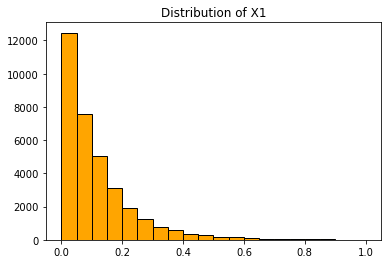

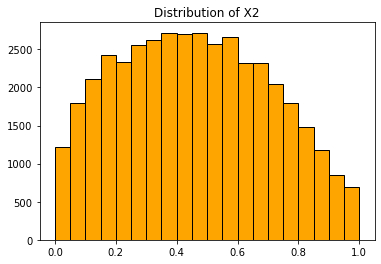

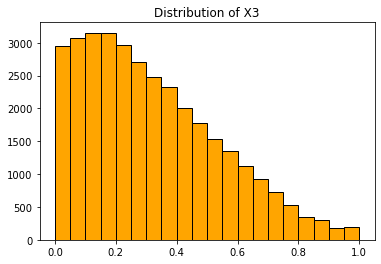

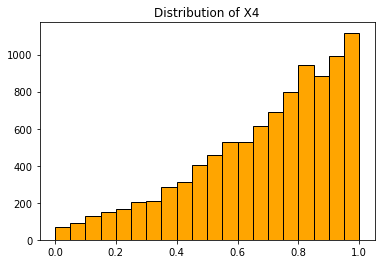

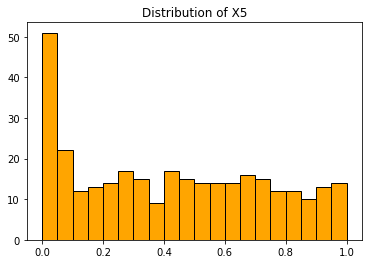

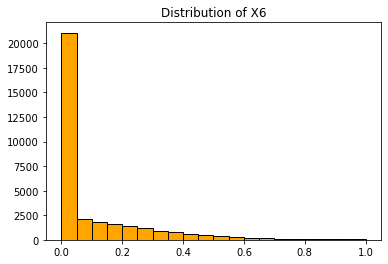

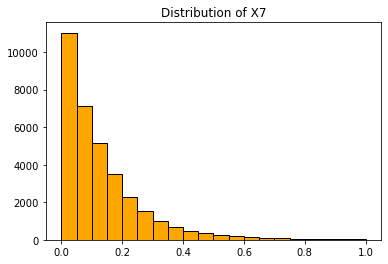

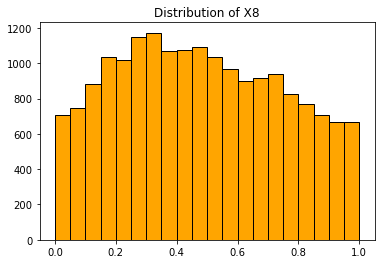

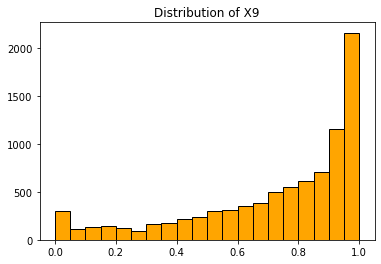

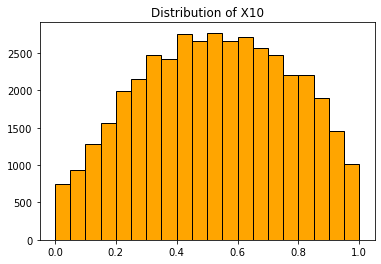

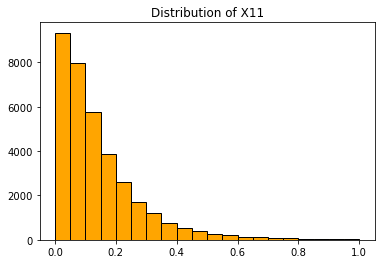

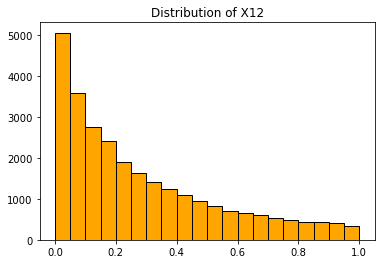

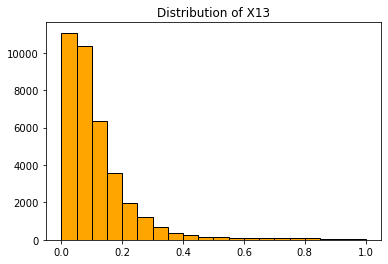

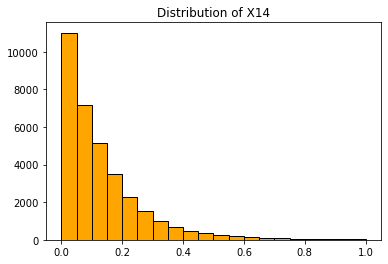

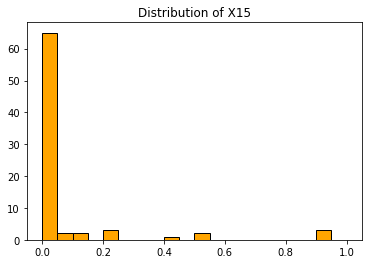

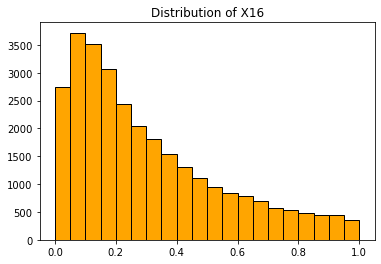

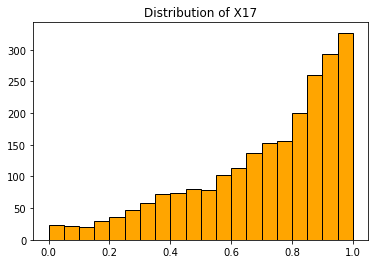

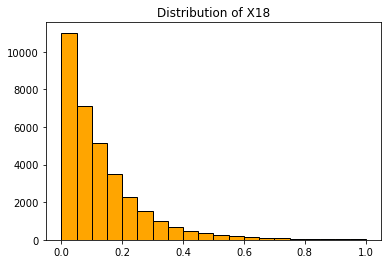

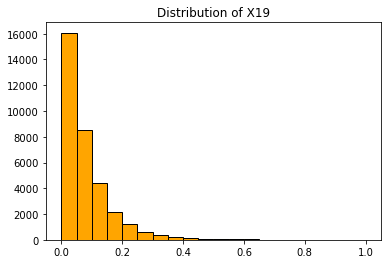

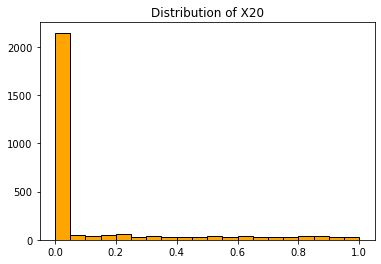

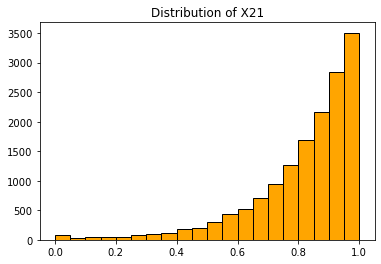

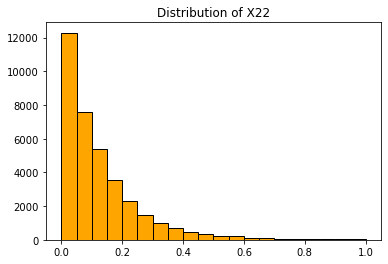

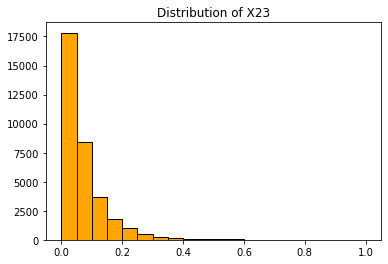

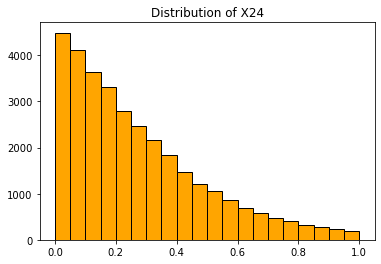

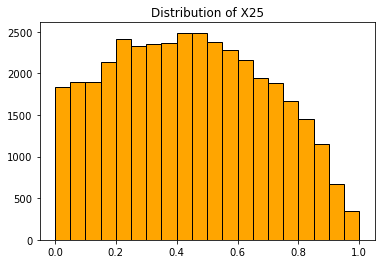

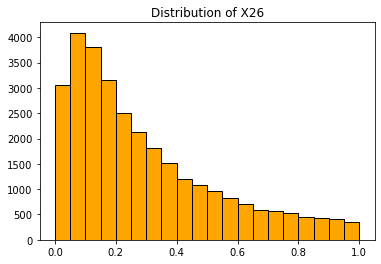

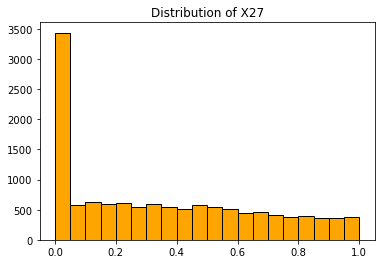

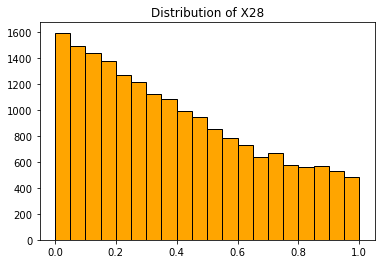

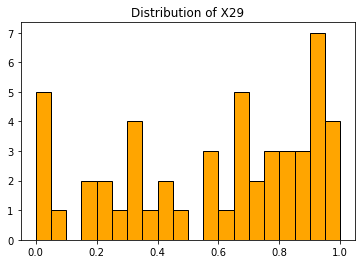

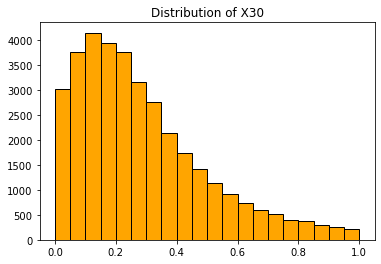

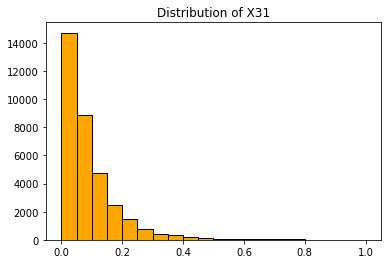

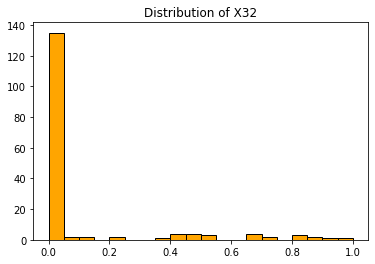

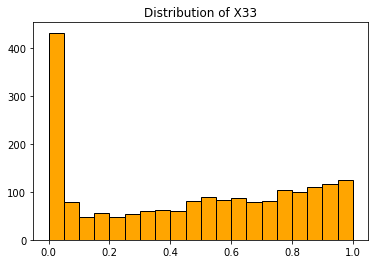

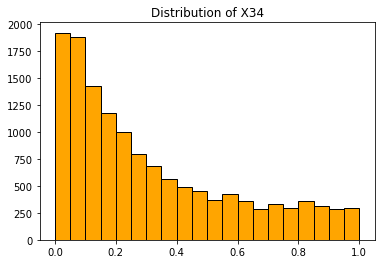

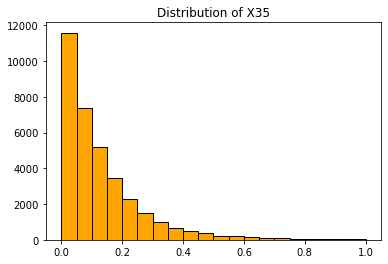

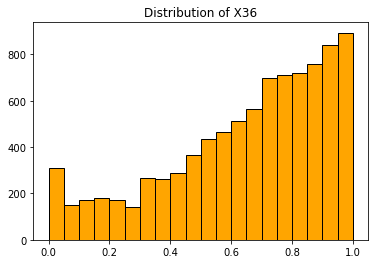

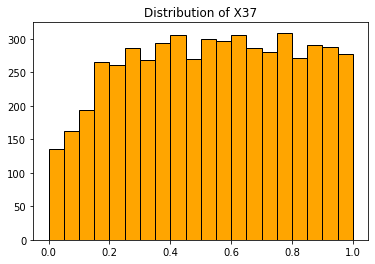

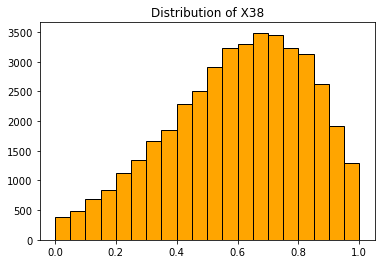

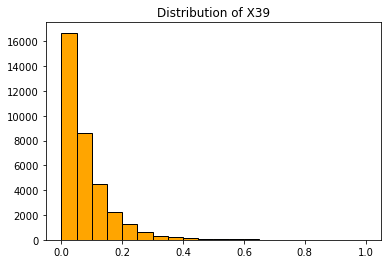

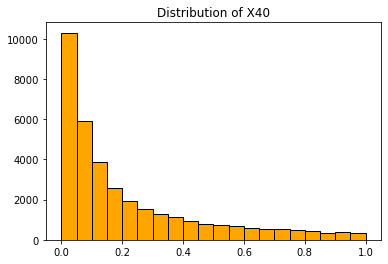

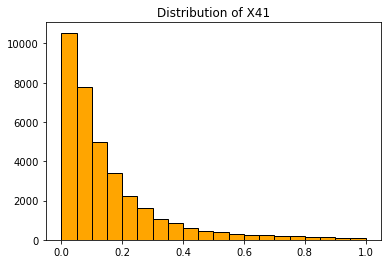

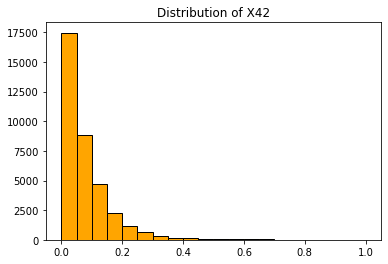

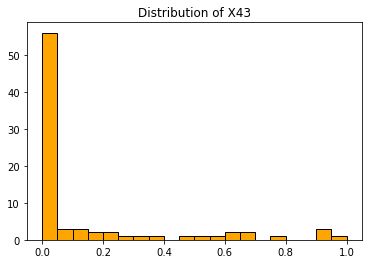

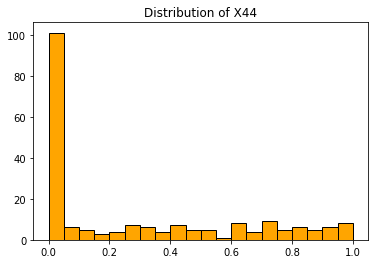

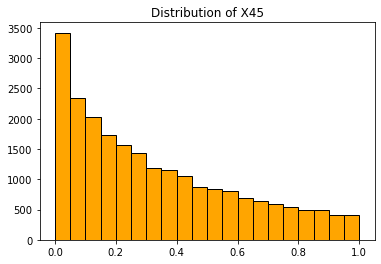

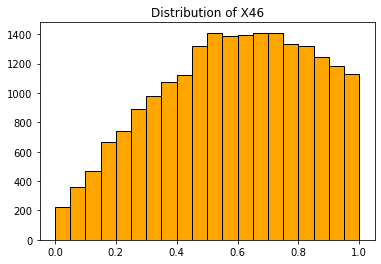

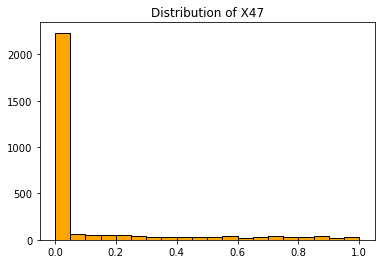

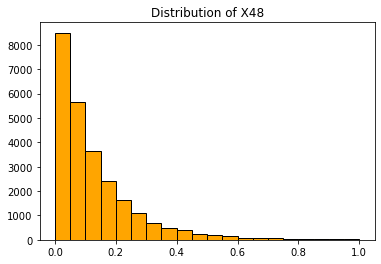

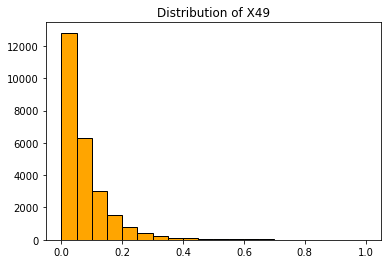

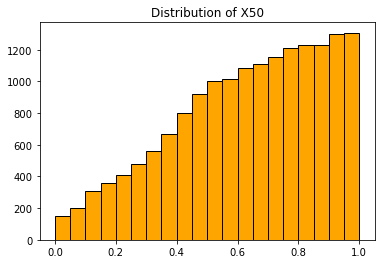

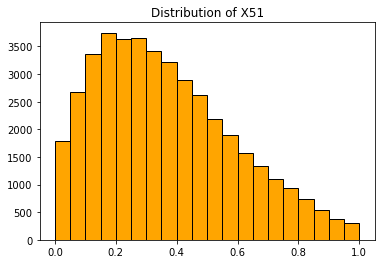

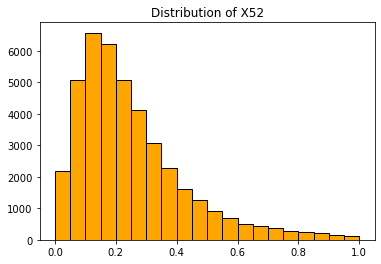

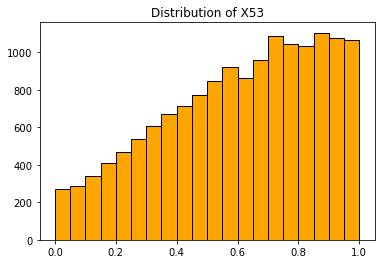

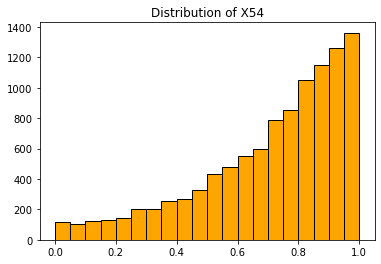

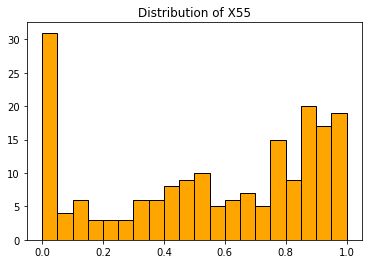

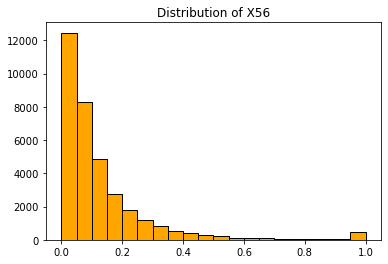

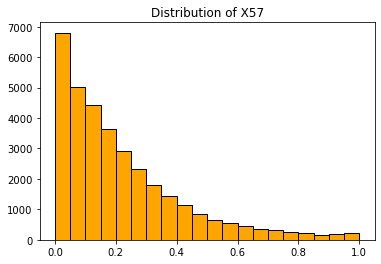

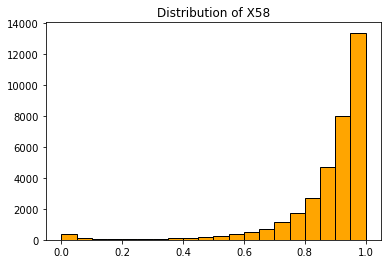

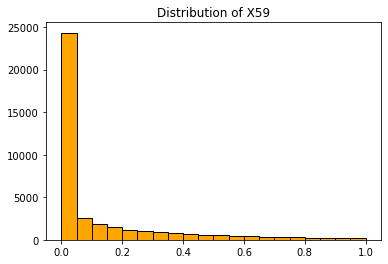

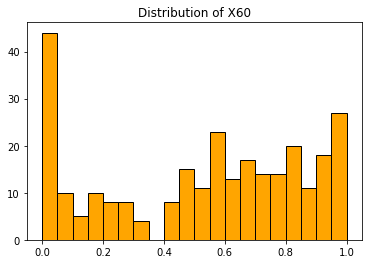

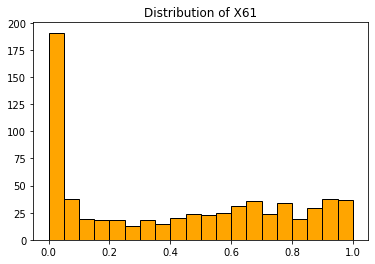

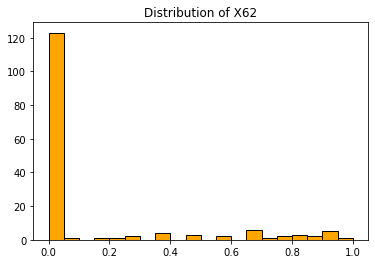

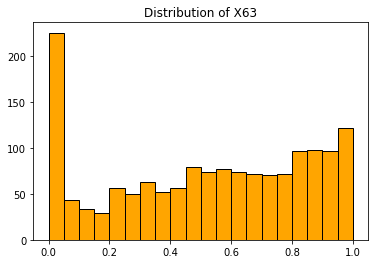

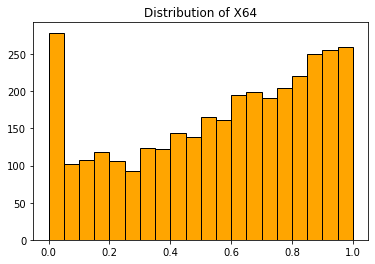

In [10]:
for col in X.columns:
    plt.hist(X[col], bins = 20, range = (0,1),color='orange', ec='black' )
    plt.title(f'Distribution of {col}')
    plt.show()

6, 15, 20, 27, 32, 33, 43, 44, 57, 59, 61, 62 - странные ребята